In [1]:
!pip install -q category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 563.9 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Image, display
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Data Loading and Preprocessing

In [3]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.shape

(20640, 10)

In [11]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['longitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'longitude'}, axis=1)
              .sort_values('longitude', ascending=True))
  xs = counted['longitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('longitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('longitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['latitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'latitude'}, axis=1)
              .sort_values('latitude', ascending=True))
  xs = counted['latitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('latitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('latitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['housing_median_age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'housing_median_age'}, axis=1)
              .sort_values('housing_median_age', ascending=True))
  xs = counted['housing_median_age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('housing_median_age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('housing_median_age')
_ = plt.ylabel('count()')

In [ ]:
df.drop_duplicates(inplace = True)

In [6]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.shape

(20640, 10)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
df = pd.get_dummies(df, columns=['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'])


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                0 non-null      float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 20640 non-null  float64
 8   median_house_value            20640 non-null  float64
 9   ocean_proximity_<1H OCEAN     20640 non-null  uint8  
 10  ocean_proximity_INLAND_0      20640 non-null  uint8  
 11  ocean_proximity_INLAND_1      20640 non-null  uint8  
 12  ocean_proximity_ISLAND_0      20640 non-null  uint8  
 13  o

In [84]:
df['total_bedrooms'].replace({"-":np.nan},inplace=True)
df['total_bedrooms']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20635   NaN
20636   NaN
20637   NaN
20638   NaN
20639   NaN
Name: total_bedrooms, Length: 20640, dtype: float64

In [85]:
df.isnull().sum()

longitude                           0
latitude                            0
housing_median_age                  0
total_rooms                         0
total_bedrooms                  20640
population                          0
households                          0
median_income                       0
median_house_value                  0
ocean_proximity_<1H OCEAN           0
ocean_proximity_INLAND_0            0
ocean_proximity_INLAND_1            0
ocean_proximity_ISLAND_0            0
ocean_proximity_ISLAND_1            0
ocean_proximity_NEAR BAY_0          0
ocean_proximity_NEAR BAY_1          0
ocean_proximity_NEAR OCEAN_0        0
ocean_proximity_NEAR OCEAN_1        0
dtype: int64

**Exploratory Data Analysis**

<Axes: xlabel='total_rooms', ylabel='median_income'>

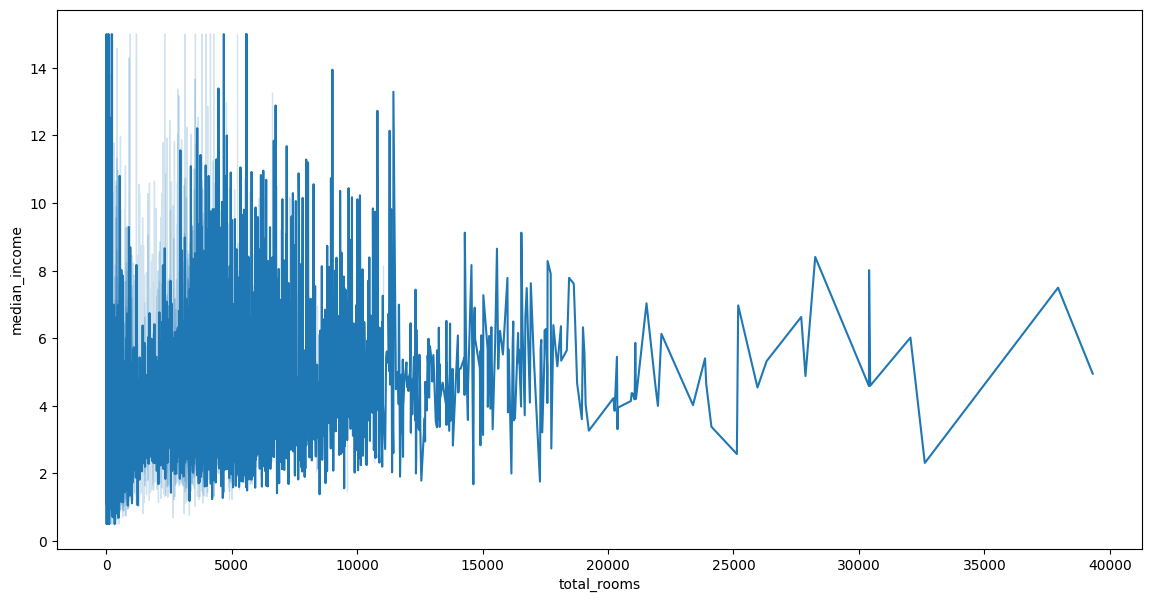

In [86]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x= df['total_rooms'],y = df['median_income'],ax = ax)

In [87]:
df['population'].value_counts()

891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: population, Length: 3888, dtype: int64

<Axes: xlabel='population', ylabel='count'>

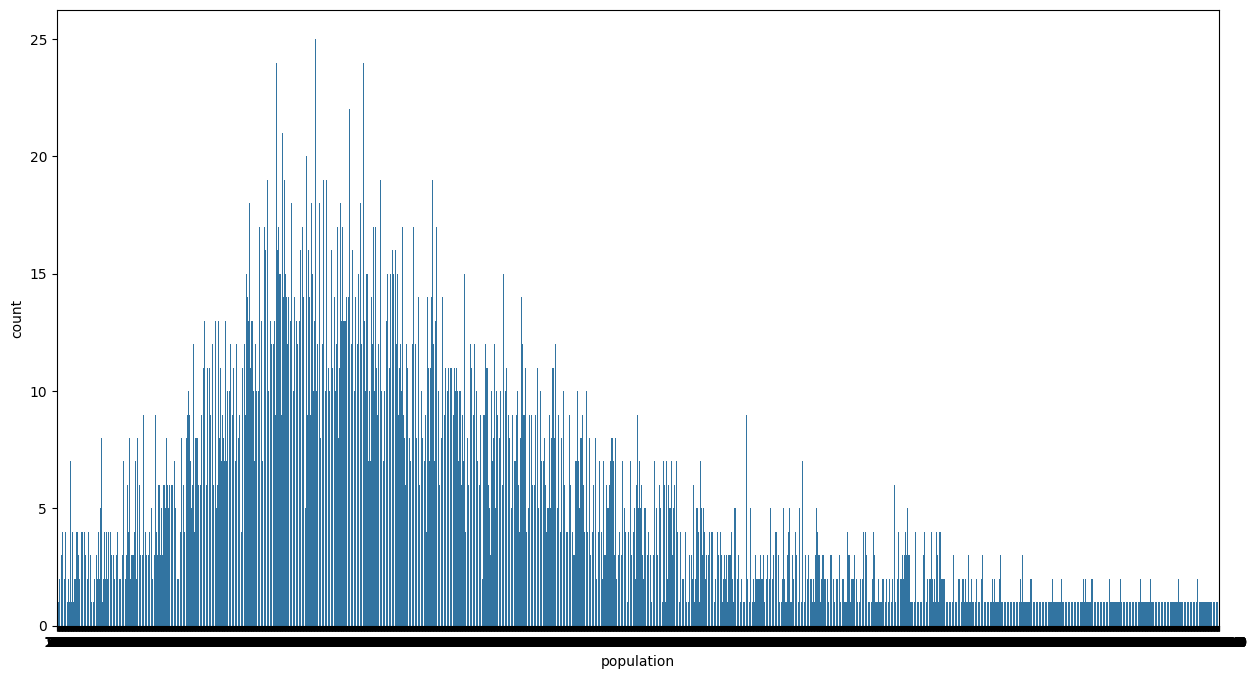

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['population'])

<Axes: xlabel='median_house_value', ylabel='count'>

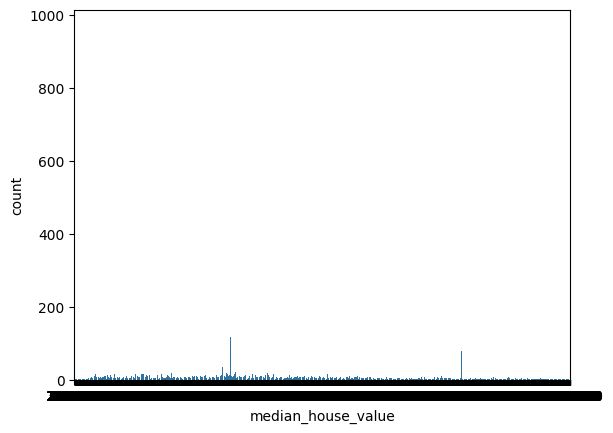

In [89]:
sns.countplot(x=df['median_house_value'])

In [90]:
df['housing_median_age'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

<Axes: xlabel='housing_median_age', ylabel='count'>

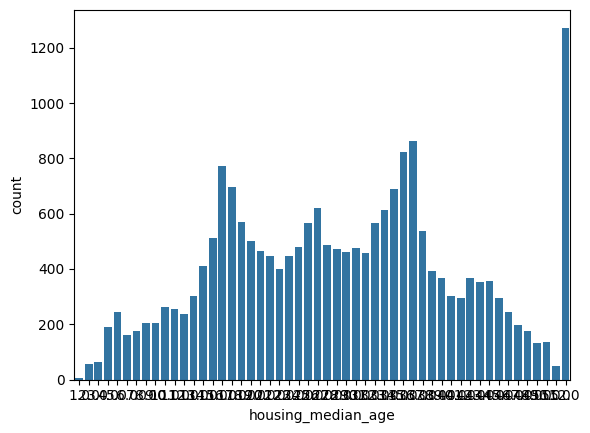

In [91]:
sns.countplot(x=df['housing_median_age'])

<Axes: xlabel='population', ylabel='Density'>

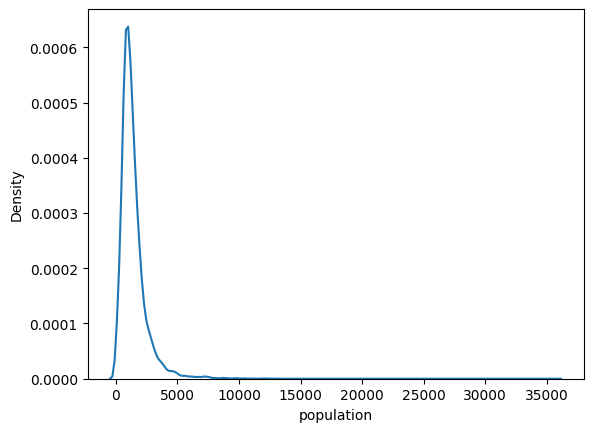

In [92]:
sns.kdeplot(x=df['population'])

<Axes: xlabel='households', ylabel='count'>

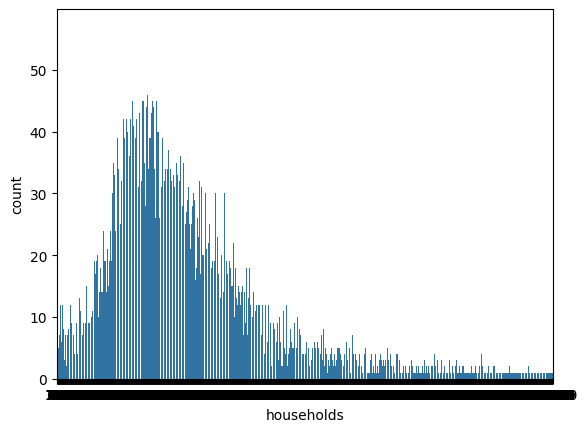

In [93]:
sns.countplot(x=df['households'])

<Axes: xlabel='longitude', ylabel='Density'>

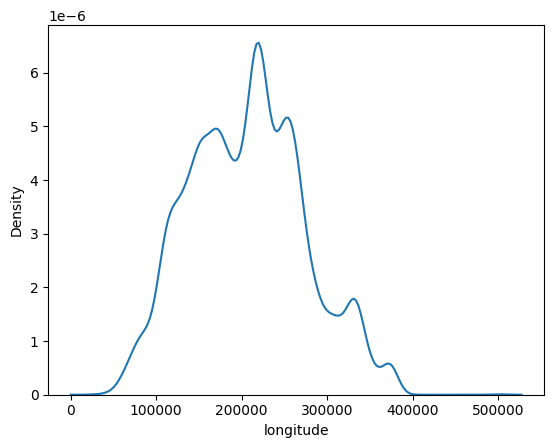

In [96]:
sns.kdeplot(x=df['longitude'])

**Feature Engineering**

In [97]:
df['total_bedrooms'] = df['total_bedrooms'].astype(float)

<ipython-input-98-0f27081d65ff>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['total_bedrooms'])


<Axes: xlabel='total_bedrooms', ylabel='Density'>

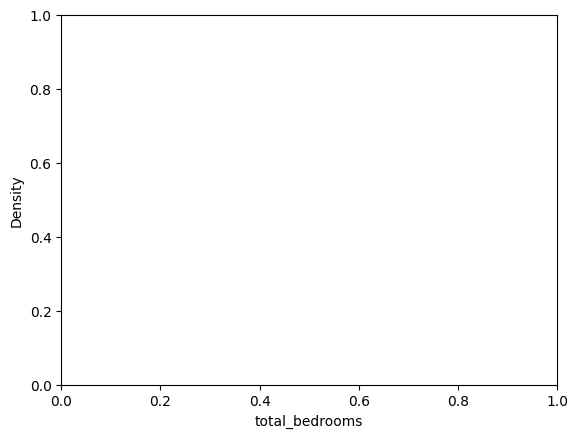

In [98]:
sns.kdeplot(df['total_bedrooms'])

In [105]:
# # Replace the missing values with knn imputer it works better compare to other techinques
# impute = KNNImputer(n_neighbors=5)
# df['total_bedrooms'] = impute.fit_transform(df['total_bedrooms'].values.reshape(-1,1))
# sns.kdeplot(df['total_bedrooms'])

In [106]:
# print(df['total_bedrooms'].empty)


In [100]:
# Performing a categorical encoding such as target guided encoding
ge = ce.LeaveOneOutEncoder()
df['longitude'] = ge.fit_transform(df['longitude'],df['median_income'])
target = ce.TargetEncoder()

In [108]:
# df['housing_median_age'] = target.fit_transform(df['housing_median_age'],df['median_house_value'])
# df['population'] = target.fit_transform(df['population'],df['median_house_value'])
# df['total_bedrooms'] = df['total_bedrooms'].map({"Yes":1,"No" : 0})
# df.corr()

In [110]:
# # plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True,fmt='.2g')

**Outlier Detection**

In [111]:
Outliers = []
def data_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        Z_score = (i-mean)/std
        if abs(Z_score)>threshold:
            Outliers.append(i)
    return Outliers
data_outliers(df['longitude'])

[500001.0, 500001.0, 500001.0, 500001.0]

In [112]:
Q1 = np.percentile(df['longitude'],25)
print("Q1 = ", Q1)
Q3 = np.percentile(df['longitude'],75)
print("Q3 = ", Q3)
IQR = Q3 - Q1
print("IQR = ", IQR)
lower_bond = Q1 - (1.5*IQR)
print("lower_bond = ", lower_bond)
upper_bond = Q3 + (1.5*IQR)
print("upper_bond = ", upper_bond)

Q1 =  154717.39130434784
Q3 =  252159.9366197183
IQR =  97442.54531537046
lower_bond =  8553.573331292137
upper_bond =  398323.75459277397


In [114]:
# df[(df['longitude'] < lower_bond) | (df['longitude'] > upper_bond)]

In [115]:
def outliers_detection(df,f):
    Q1 = np.percentile(df[f],25)
    Q3 = np.percentile(df[f],75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

    ls = df.index[(df[f] < lower_bound ) | (df[f] > upper_bound) ]

    return ls

In [116]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND_0', 'ocean_proximity_INLAND_1',
       'ocean_proximity_ISLAND_0', 'ocean_proximity_ISLAND_1',
       'ocean_proximity_NEAR BAY_0', 'ocean_proximity_NEAR BAY_1',
       'ocean_proximity_NEAR OCEAN_0', 'ocean_proximity_NEAR OCEAN_1'],
      dtype='object')

In [118]:
# index_list = []
# ## using for loop to extract all the outliers
# for feature in ['longitude', 'total_bedrooms', 'median_house_value']:
#     index_list.extend(outliers_detection(df,feature))

In [119]:
print(index_list)

[9010, 12341, 20426, 20436]


In [120]:
len(index_list)

4

In [121]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

#Moving non outliers to cleaned dataset
df_cleaned = remove(df,index_list)
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND_0,ocean_proximity_INLAND_1,ocean_proximity_ISLAND_0,ocean_proximity_ISLAND_1,ocean_proximity_NEAR BAY_0,ocean_proximity_NEAR BAY_1,ocean_proximity_NEAR OCEAN_0,ocean_proximity_NEAR OCEAN_1
0,220313.958333,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0,0,1,0,1,0,0,1,1,0
1,224996.176471,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0,0,1,0,1,0,0,1,1,0
2,247275.729730,37.85,52.0,1467.0,NaN,496.0,177.0,7.2574,352100.0,0,1,0,1,0,0,1,1,0
3,249513.872340,37.85,52.0,1274.0,NaN,558.0,219.0,5.6431,341300.0,0,1,0,1,0,0,1,1,0
4,249513.872340,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,139633.333333,39.48,25.0,1665.0,NaN,845.0,330.0,1.5603,78100.0,0,0,1,1,0,1,0,1,0
20636,154477.777778,39.49,18.0,697.0,NaN,356.0,114.0,2.5568,77100.0,0,0,1,1,0,1,0,1,0
20637,133082.758621,39.43,17.0,2254.0,NaN,1007.0,433.0,1.7000,92300.0,0,0,1,1,0,1,0,1,0
20638,126894.827586,39.43,18.0,1860.0,NaN,741.0,349.0,1.8672,84700.0,0,0,1,1,0,1,0,1,0


<Axes: xlabel='longitude'>

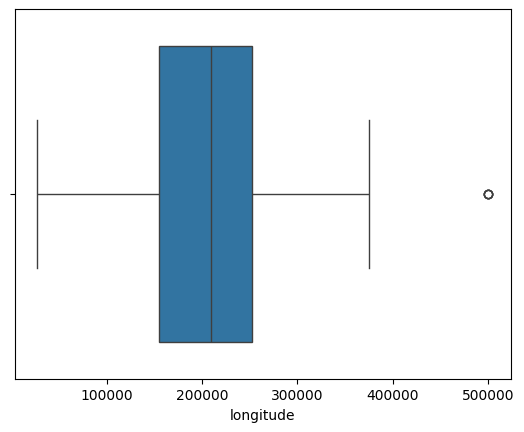

In [123]:
sns.boxplot(x=df['longitude'])

<Axes: xlabel='longitude'>

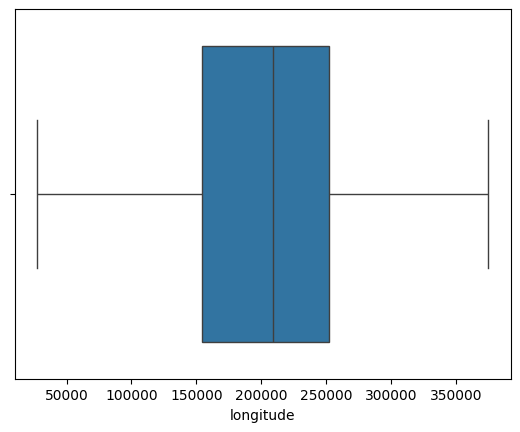

In [124]:
sns.boxplot(x=df_cleaned['longitude'])

<Axes: >

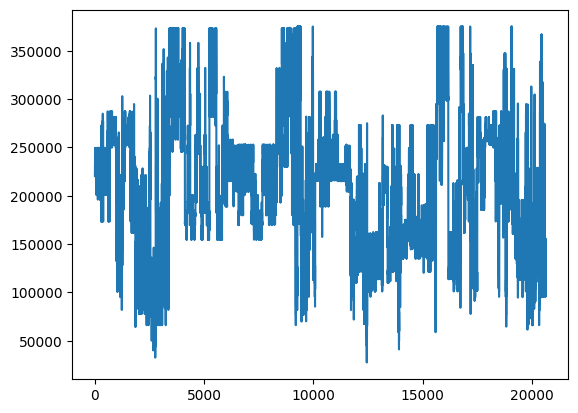

In [125]:
df_cleaned['longitude'].plot()

<Axes: xlabel='longitude', ylabel='Density'>

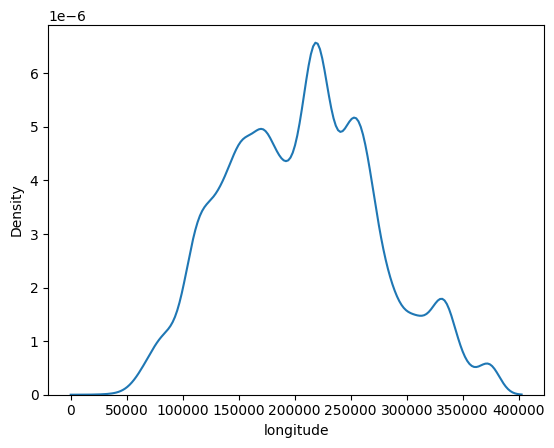

In [126]:
sns.kdeplot(df_cleaned['longitude'])

In [127]:
x = df_cleaned.drop('longitude',axis = 1)
x

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND_0,ocean_proximity_INLAND_1,ocean_proximity_ISLAND_0,ocean_proximity_ISLAND_1,ocean_proximity_NEAR BAY_0,ocean_proximity_NEAR BAY_1,ocean_proximity_NEAR OCEAN_0,ocean_proximity_NEAR OCEAN_1
0,37.88,41.0,880.0,1.226277e-313,322.0,126.0,8.3252,452600.0,0,1,0,1,0,0,1,1,0
1,37.86,21.0,7099.0,1.226277e-313,2401.0,1138.0,8.3014,358500.0,0,1,0,1,0,0,1,1,0
2,37.85,52.0,1467.0,1.226277e-313,496.0,177.0,7.2574,352100.0,0,1,0,1,0,0,1,1,0
3,37.85,52.0,1274.0,1.226277e-313,558.0,219.0,5.6431,341300.0,0,1,0,1,0,0,1,1,0
4,37.85,52.0,1627.0,1.226277e-313,565.0,259.0,3.8462,342200.0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,25.0,1665.0,1.226277e-313,845.0,330.0,1.5603,78100.0,0,0,1,1,0,1,0,1,0
20636,39.49,18.0,697.0,1.226277e-313,356.0,114.0,2.5568,77100.0,0,0,1,1,0,1,0,1,0
20637,39.43,17.0,2254.0,1.226277e-313,1007.0,433.0,1.7000,92300.0,0,0,1,1,0,1,0,1,0
20638,39.43,18.0,1860.0,1.226277e-313,741.0,349.0,1.8672,84700.0,0,0,1,1,0,1,0,1,0


In [128]:
x.columns

Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND_0',
       'ocean_proximity_INLAND_1', 'ocean_proximity_ISLAND_0',
       'ocean_proximity_ISLAND_1', 'ocean_proximity_NEAR BAY_0',
       'ocean_proximity_NEAR BAY_1', 'ocean_proximity_NEAR OCEAN_0',
       'ocean_proximity_NEAR OCEAN_1'],
      dtype='object')

In [129]:
y = df_cleaned['longitude']

In [130]:
names = x.columns

In [131]:
names = list(x.columns)
print(names)

['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND_0', 'ocean_proximity_INLAND_1', 'ocean_proximity_ISLAND_0', 'ocean_proximity_ISLAND_1', 'ocean_proximity_NEAR BAY_0', 'ocean_proximity_NEAR BAY_1', 'ocean_proximity_NEAR OCEAN_0', 'ocean_proximity_NEAR OCEAN_1']


# Node Class

In [132]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, m_error=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.m_error = m_error

        # for leaf node
        self.value = value

# Tree Class

In [133]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split, max_depth, feature_names):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None
        self.feature_names = feature_names

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if m_error is positive
            if best_split["m_error"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["m_error"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_m_error = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute error
                    curr_m_error = self.msae_error(y, left_y, right_y, "mse")
                    # update the best split if needed
                    if curr_m_error>max_m_error:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["m_error"] = curr_m_error
                        max_m_error  = curr_m_error

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def msae_error(self, parent, l_child, r_child, mode="mae"):
        ''' function to compute mean squarred or absolute error '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="mse":
          #mse
            error = np.mean((parent - np.mean(parent))**2) - (weight_l * np.mean((l_child - np.mean(l_child))**2) + weight_r * np.mean((r_child - np.mean(r_child))**2))
        else:
          #mae
            error = np.mean(np.abs(parent - np.median(parent))) - (weight_l * np.mean(np.abs(l_child - np.median(l_child))) + weight_r * np.mean(np.abs(r_child - np.median(r_child))))
        return error


    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        val = np.mean(Y)
        return val

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            #print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.m_error)
            print(self.feature_names[tree.feature_index], "<=", tree.threshold, "?", tree.m_error)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def visualize_tree(self):
        dot_data = "digraph Tree {\n" \
                   "node [shape=box] ;\n"

        def add_node(node, parent_index=None):
            nonlocal dot_data, node_count
            index = node_count
            label = ""
            if node.feature_index is None:
                label = str(node.value)
            else:
                if self.feature_names is not None:
                    label = f"{self.feature_names[node.feature_index]} < {node.threshold}"
                else:
                    label = f"{node.feature_index} < {node.threshold}"
            dot_data += f"{index} [label=\"{label}\"] ;\n"
            if parent_index is not None:
                dot_data += f"{parent_index} -> {index} ;\n"
            node_count += 1
            if node.feature_index is not None:
                add_node(node.left, index)
                add_node(node.right, index)

        node_count = 0
        add_node(self.root)
        dot_data += "}"
        graph = graphviz.Source(dot_data)
        return graph

# Split the Dataset into Train and Test

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND_0,ocean_proximity_INLAND_1,ocean_proximity_ISLAND_0,ocean_proximity_ISLAND_1,ocean_proximity_NEAR BAY_0,ocean_proximity_NEAR BAY_1,ocean_proximity_NEAR OCEAN_0,ocean_proximity_NEAR OCEAN_1
16648,35.27,15.0,2365.0,1.226277e-313,1446.0,490.0,2.5129,225900.0,0,1,0,1,0,1,0,0,1
20237,34.27,52.0,1577.0,1.226277e-313,836.0,335.0,3.5893,206600.0,0,1,0,1,0,1,0,0,1
2201,36.83,11.0,2497.0,1.226277e-313,1101.0,405.0,4.8036,141600.0,0,0,1,1,0,1,0,1,0
13218,34.00,5.0,3761.0,1.226277e-313,2335.0,648.0,5.7338,225400.0,0,0,1,1,0,1,0,1,0
13035,38.71,15.0,3084.0,1.226277e-313,1040.0,562.0,2.5183,293300.0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349,37.97,52.0,1833.0,1.226277e-313,735.0,306.0,4.6944,398900.0,0,1,0,1,0,0,1,1,0
4384,34.09,44.0,3646.0,1.226277e-313,1783.0,861.0,2.9709,225000.0,1,1,0,1,0,1,0,1,0
3212,36.34,46.0,1730.0,1.226277e-313,752.0,323.0,1.8529,67200.0,0,0,1,1,0,1,0,1,0
13588,34.12,45.0,1369.0,1.226277e-313,1046.0,274.0,1.8438,72100.0,0,0,1,1,0,1,0,1,0


In [135]:
y_train

16648    174452.941176
20237    168125.000000
2201     116581.818182
13218    212552.318182
13035    213171.428571
             ...      
9349     331323.764706
4384     178697.923611
3212      83692.307692
13588    148069.813953
18924    173358.060000
Name: longitude, Length: 16508, dtype: float64

In [136]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [137]:
print(x_train.shape)
print(y_train.shape)

(16508, 17)
(16508,)


In [138]:
y_train = y_train.values.reshape(-1, 1)
print(y_train.shape)

(16508, 1)


# Fit the model with MSE

In [139]:
regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=7, feature_names=names)
regressor.fit(x_train, y_train)

# Model Evaluation with MSE Criterion

**Evaluation the Training Set**

In [151]:
y_train_pred = regressor.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print('R-squared:', r2_train)
print('RMSE:', rmse_train)

R-squared: 0.6569386802932067
RMSE: 39210.13570650825


**Evaluation on the Testing Set**

In [152]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared:', r2)
print('RMSE:', rmse)

R-squared: 0.599968674199619
RMSE: 42277.35869854159


**Print and Display the tree with MSE Criterion**

In [153]:
# print the tree
regressor.print_tree()

median_house_value <= -0.368077236751919 ? 1272750864.0913649
 left:ocean_proximity_INLAND_0 <= -1.469910082287203 ? 412841374.6610303
  left:median_house_value <= -1.1868467383986305 ? 149618577.41997623
    left:latitude <= 1.412371120755159 ? 383475766.4496684
        left:latitude <= -0.8916794006197082 ? 277049876.48838854
                left:median_house_value <= -1.3072795010747076 ? 44254984.981621206
                                left:housing_median_age <= -0.9283106325873156 ? 25733287.9890873
                                                                left:median_house_value <= -1.5117552707981192 ? 34400185.18518519
                                                                                                                                left:32500.0
                                                                                                                                right:49261.1111111111
                                                                r

In [154]:
graph = regressor.visualize_tree()
graph.render(filename="MSE_Tree", view=True, format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.759603 to fit


'MSE_Tree.png'

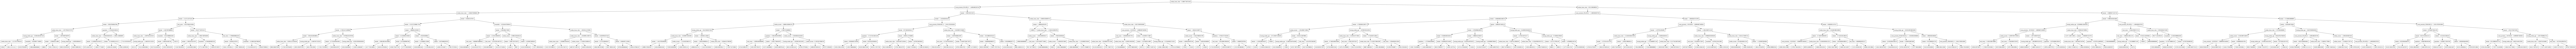

In [155]:
# display the tree
display(Image('MSE_Tree.png'))

# Fit the Model with MAE

**Note:** I implemented both MSE and MAE in the tree class.

Just changed the "msae_error" method's mode="MAE" from mode="MSE"

In [156]:
regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=7, feature_names=names)
regressor.fit(x_train, y_train)

# Model Evaluation with MAE Criterion

**Evaluation the Training Set**

In [157]:
y_train_pred = regressor.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print('R-squared:', r2_train)
print('RMSE:', rmse_train)

R-squared: 0.6569386802932067
RMSE: 39210.13570650825


**Evaluation on the Testing Set**

In [158]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared:', r2)
print('RMSE:', rmse)

R-squared: 0.599968674199619
RMSE: 42277.35869854159


**Print and Display the tree with MSE Criterion**

In [159]:
# print the tree
regressor.print_tree()

median_house_value <= -0.368077236751919 ? 1272750864.0913649
 left:ocean_proximity_INLAND_0 <= -1.469910082287203 ? 412841374.6610303
  left:median_house_value <= -1.1868467383986305 ? 149618577.41997623
    left:latitude <= 1.412371120755159 ? 383475766.4496684
        left:latitude <= -0.8916794006197082 ? 277049876.48838854
                left:median_house_value <= -1.3072795010747076 ? 44254984.981621206
                                left:housing_median_age <= -0.9283106325873156 ? 25733287.9890873
                                                                left:median_house_value <= -1.5117552707981192 ? 34400185.18518519
                                                                                                                                left:32500.0
                                                                                                                                right:49261.1111111111
                                                                r

In [160]:
graph = regressor.visualize_tree()
graph.render(filename="MAE_Tree", view=True, format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.759603 to fit


'MAE_Tree.png'

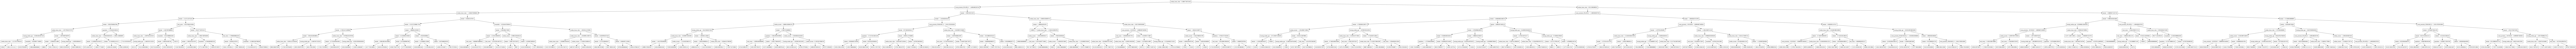

In [161]:
# display the tree
display(Image('MAE_Tree.png'))

# References